# Molecular Motion: 
Modify rw_visual.py by replacing ax.scatter() with
ax.plot(). To simulate the path of a pollen grain on the surface of a drop of
water, pass in the rw.x_values and rw.y_values, and include a linewidth argument.
Use 5,000 instead of 50,000 points to keep the plot from being too busy.

# RandomWalk Class

### Class Initialization
The code defines a `RandomWalk` class responsible for generating random walks. In the constructor (`__init__` method), attributes are initialized:

- `num_points`: Defaulted to 5000, representing the number of walk points.
- `x_values` and `y_values`: Lists storing x and y coordinates, starting at (0, 0).

### Filling the Walk
The core of random walk generation is in the `fill_walk` method:

- A `while` loop continues until `num_points` is reached.
- Random steps in the x and y directions are generated using `get_step`.
- If both steps are zero (no movement), the loop continues.
- New coordinates are calculated by adding steps, and points are appended to `x_values` and `y_values`.

### Generating Random Steps
The `get_step` method determines step direction and distance:

- Direction is randomly chosen from [1, -1] (right or left).
- Distance is randomly selected from [0, 1, 2, 3, 4, 5, 6, 7, 8].
- Step is calculated as direction * distance.


## Generating and Visualizing Random Walks
Random walks are generated and visualized in an infinite loop. Key steps include:

- Creating a `RandomWalk` instance with 5000 points and filling the walk.
- Creating a range of point numbers for coloring.
- Configuring Matplotlib for plotting.
- Using `ax.plot()` instead of `ax.scatter()` for the plot.
- Highlighting the first and last points in green and red.
- Hiding axes and maintaining an equal aspect ratio.
- Adding a title and displaying the plot.


## Prompting for User Input
After each walk, the user is prompted to generate another:

- Entering 'n' exits the loop and stops the code execution.


## Modifications
The code is adaptable:

- Experiment with different point counts, step sizes, and visual aspects.
- Customize colors, markers, and other plot settings.


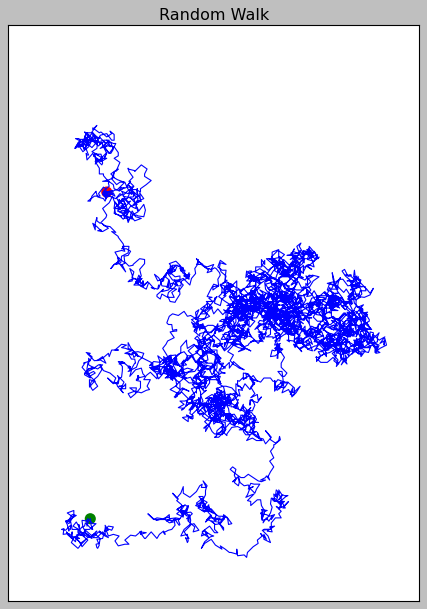

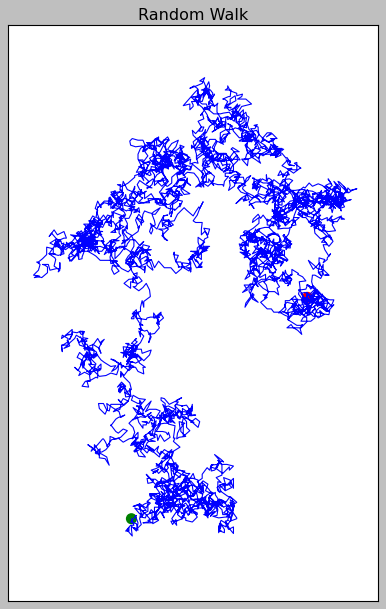

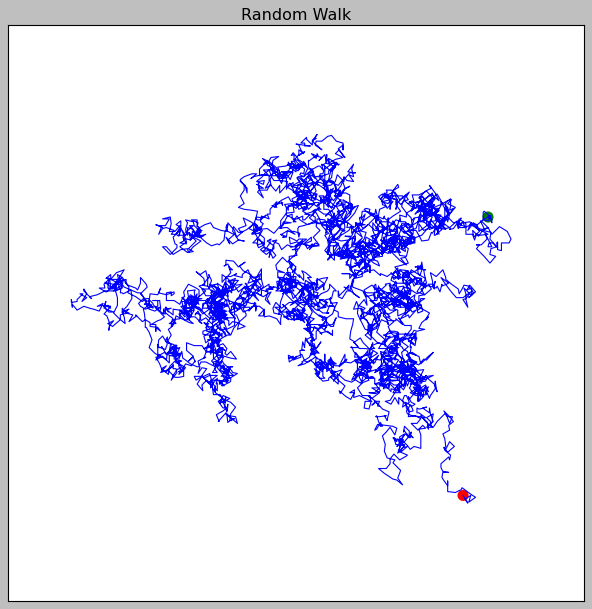

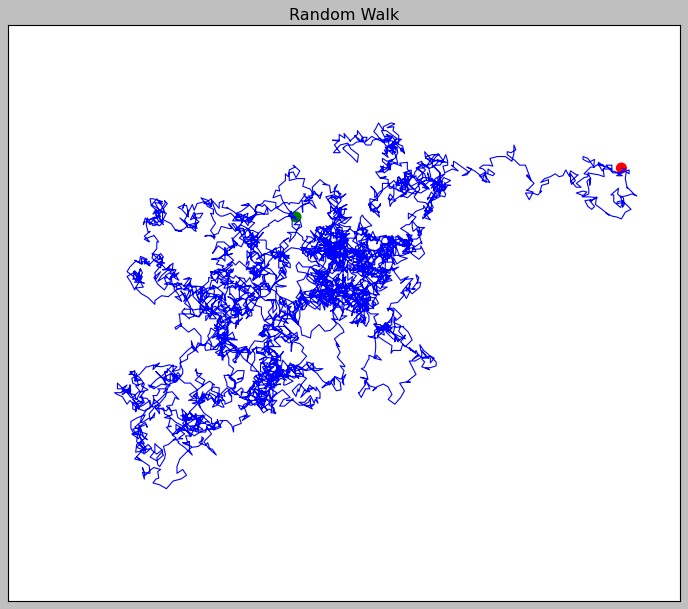

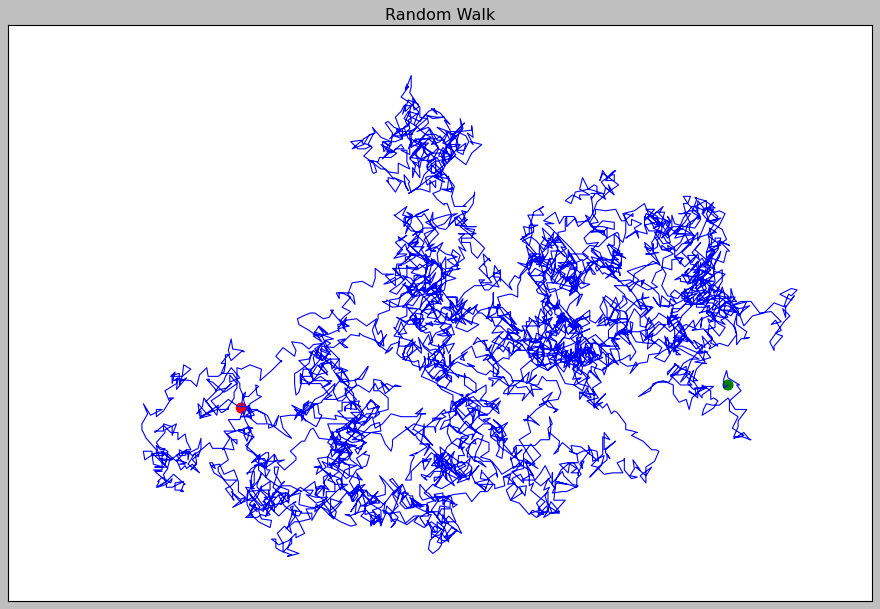

In [3]:
import matplotlib.pyplot as plt
from random import choice

class RandomWalk:
    """A class to generate random walks."""

    def __init__(self, num_points=5000):
        """Initialize attributes of a walk."""
        self.num_points = num_points
        self.x_values = [0]
        self.y_values = [0]

    def fill_walk(self):
        """Calculate all the points in the walk."""
        while len(self.x_values) < self.num_points:
            x_step = self.get_step()
            y_step = self.get_step()

            if x_step == 0 and y_step == 0:
                continue

            x = self.x_values[-1] + x_step
            y = self.y_values[-1] + y_step

            self.x_values.append(x)
            self.y_values.append(y)

    def get_step(self):
        direction = choice([1, -1])
        distance = choice(list(range(9)))  # Changed to 0 through 8
        step = direction * distance
        return step

# Generating and Visualizing Random Walks

# Inside the loop:
while True:
    rw = RandomWalk(5000)  # Using 5000 points
    rw.fill_walk()

    # Create a range of point numbers for coloring
    point_numbers = range(rw.num_points)

    plt.style.use('classic')
    fig, ax = plt.subplots(figsize=(15, 9))

    # Replace ax.scatter() with ax.plot()
    ax.plot(rw.x_values, rw.y_values, linewidth=1)  # Adjust linewidth as needed

    ax.scatter(0, 0, c='green', edgecolors='none', s=100)
    ax.scatter(rw.x_values[-1], rw.y_values[-1], c='red', edgecolors='none', s=100)

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax.set_aspect('equal')
    plt.title("Random Walk")

    plt.show()

    keep_running = input("Make another walk? (y/n): ")
    if keep_running == 'n':
        break
